In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

(2448, 3264, 3)


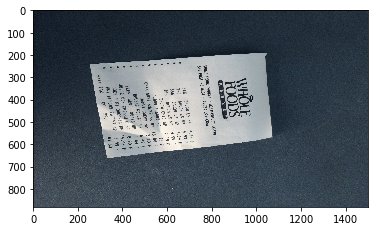

(880, 1500, 3)


In [10]:
img = cv2.imread('./images/receipt.jpg')
print img.shape
img = cv2.resize(img, (1500,880))
orig = img.copy()           #COPY
plt.imshow(img)
plt.show()
print img.shape

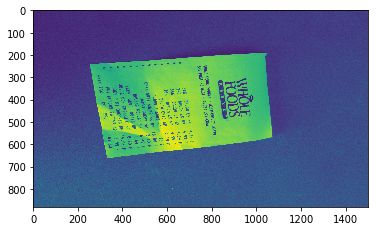

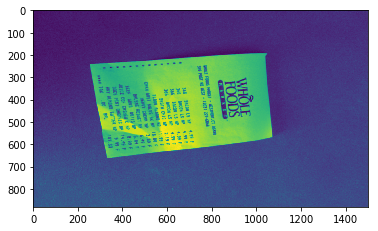

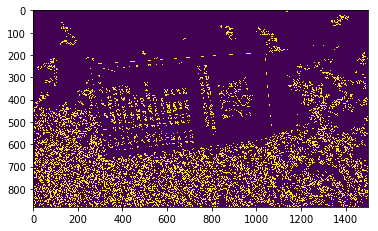

In [11]:
# Step 1: Edge Detection

#1.1 Conversion to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(0)
plt.imshow(gray)

#1.2 Blurring for Smoothness :- Options-> Gaussian Blur, Median Blur
blurred = cv2.GaussianBlur(gray, (5,5), 0)
#blurred = cv2.medianBlur(gray, 5)
plt.figure(1)
plt.imshow(blurred)

#1.3 Applying the Edge Detection
edged = cv2.Canny(blurred, 0, 50)
orig_edged = edged.copy()            #COPY
plt.figure(2)
plt.imshow(edged)

plt.show()

In [12]:
def rectify(h):
    print h
    h = h.reshape((4,2))
    print h
    hnew = np.zeros((4,2),dtype = np.float32)

    add = h.sum(1)
    print add
    
    hnew[0] = h[np.argmin(add)]
    hnew[2] = h[np.argmax(add)]

    diff = np.diff(h,axis = 1)
    hnew[1] = h[np.argmin(diff)]
    hnew[3] = h[np.argmax(diff)]

    return hnew

In [13]:
# Find contours in the edged image; keep only the largest ones, and initialize the screen contour
(contours, _) = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Get approximate contour
for c in contours:
    p = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * p, True)

    if len(approx) == 4:
        target = approx
        break

ValueError: too many values to unpack

In [14]:
# Map target points to 800x800 quadrilateral
print target
approx = rect.rectify(target)
print approx
pts2 = np.float32([[0,0],[800,0],[800,800],[0,800]])

M = cv2.getPerspectiveTransform(approx,pts2)
dst = cv2.warpPerspective(orig,M,(800,800))

cv2.drawContours(image, [target], -1, (0, 255, 0), 2)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

NameError: name 'target' is not defined

In [ ]:
# Using thresholding on warped image to get scanned effect (If Required)
ret,th1 = cv2.threshold(dst,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(dst,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(dst,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
ret2,th4 = cv2.threshold(dst,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [ ]:
plt.figure(0)
plt.imshow(orig)

plt.figure(1)
plt.imshow(gray)

plt.figure(2)
plt.imshow(orig_edged)

plt.figure(3)
plt.imshow(th3)

plt.figure(4)
plt.imshow(dst)